In [6]:
#Compressed Dataset file is stored at: https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

!wget https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

--2021-02-20 10:10:16--  https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7avu1oypedrerxl/Dataset.zip [following]
--2021-02-20 10:10:16--  https://www.dropbox.com/s/raw/7avu1oypedrerxl/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc229c4aa8195f5350110cca23c8.dl.dropboxusercontent.com/cd/0/inline/BJQqOIBoj8J8Je7_5Q_E6iXsFprNB_NCh5vbLGQPqvxjKBb5T9bBQXoK_3RqbmOU9mJVqlcXM05Njd-FekcP77TwYVJSy-JPCflD4e7XOGyIeHQJBVKJ7yGvJdbmDE6F_ac/file# [following]
--2021-02-20 10:10:16--  https://uc229c4aa8195f5350110cca23c8.dl.dropboxusercontent.com/cd/0/inline/BJQqOIBoj8J8Je7_5Q_E6iXsFprNB_NCh5vbLGQPqvxjKBb5T9bBQXoK_3RqbmOU9mJVqlcXM05Njd-FekcP77TwYVJSy-JPCflD4e7XOGyIe

In [7]:
!unzip /content/Dataset.zip?dl=0  #Extracting the compressed dataset

Archive:  /content/Dataset.zip?dl=0
   creating: Dataset/
   creating: Dataset/Test/
   creating: Dataset/Test/COVID/
  inflating: Dataset/Test/COVID/COVID (1001).png  
  inflating: Dataset/Test/COVID/COVID (1005).png  
  inflating: Dataset/Test/COVID/COVID (1012).png  
  inflating: Dataset/Test/COVID/COVID (1015).png  
  inflating: Dataset/Test/COVID/COVID (1019).png  
  inflating: Dataset/Test/COVID/COVID (1025).png  
  inflating: Dataset/Test/COVID/COVID (1027).png  
  inflating: Dataset/Test/COVID/COVID (1042).png  
  inflating: Dataset/Test/COVID/COVID (1043).png  
  inflating: Dataset/Test/COVID/COVID (1044).png  
  inflating: Dataset/Test/COVID/COVID (107).png  
  inflating: Dataset/Test/COVID/COVID (1073).png  
  inflating: Dataset/Test/COVID/COVID (1095).png  
  inflating: Dataset/Test/COVID/COVID (1099).png  
  inflating: Dataset/Test/COVID/COVID (113).png  
  inflating: Dataset/Test/COVID/COVID (1132).png  
  inflating: Dataset/Test/COVID/COVID (1143).png  
  inflating: Data

In [ ]:
# Installing Tensorflow 2.3 as it supports keras.preprocessing.image_dataset_from_directory function
!pip install tensorflow==2.3

     |████████████████████████████████| 320.4MB 54kB/s 
     |████████████████████████████████| 460kB 42.9MB/s 
     |████████████████████████████████| 20.1MB 181kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:


In [1]:
!pip show tensorflow #Check which version of Tensorflow is present

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: h5py, wheel, absl-py, six, scipy, termcolor, wrapt, grpcio, protobuf, gast, opt-einsum, tensorboard, tensorflow-estimator, numpy, keras-preprocessing, astunparse, google-pasta
Required-by: fancyimpute


In [3]:
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_images_path = "Dataset/Train"
validation_images_path = "Dataset/Validation"
test_images_path = "Dataset/Test"

In [5]:
#Preprocessing the training and validation datasets
train_ds = image_dataset_from_directory(
    directory= train_images_path,
    labels='inferred',
    label_mode='int',
    batch_size=60,
    image_size=(256, 256)) #resized all images to 256x256
validation_ds = image_dataset_from_directory(
    directory= validation_images_path,
    labels='inferred',
    label_mode='int',
    batch_size=30,
    image_size=(256, 256))

Found 3108 files belonging to 3 classes.
Found 388 files belonging to 3 classes.


In [41]:
#CNN Based Model using Keras(Sequential Model)
#Multiple layers with different number of filters
#Layered architecture with 4 Convolutional Layers
model = Sequential()

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape =(256,256,3)
                 )) #224 is standard size, imagenet models are also trained on this size

model.add(Conv2D(64,
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) #to prevent overfitting

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(128,
                 kernel_size = (3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5)) #changed dropout value from 0.25 to 0.5 to further prevent overfitting

model.add(Dense(3,activation='sigmoid')) 
# output labels are [0,3), so 3 is used
#sigmoid function convert the data into probabilities for each class

#it is not binary crossentropy anymore so we sparse categorical crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #configure the learning process

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 62, 62, 64)       

In [42]:
print(model.input.shape)

(None, 256, 256, 3)


In [43]:
#Training data augmentation before feeding it to the CNN model
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )

train_generator= train_datagen.flow_from_directory(
    train_images_path,
    target_size = (256,256),
    batch_size = 60,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

Found 3108 images belonging to 3 classes.


In [44]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [45]:
#Validation data augmentation before feeding it to the CNN model

validation_dataset = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )

validation_generator = validation_dataset.flow_from_directory(
    validation_images_path,
    target_size = (256,256),
    batch_size = 10,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

Found 388 images belonging to 3 classes.


In [46]:
validation_generator.class_indices

{'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [47]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

51
38


In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN, 
    epochs=10,
    validation_data = validation_generator,
    validation_steps = STEP_SIZE_VALID
    )

Epoch 1/10
51/51 [==============================] - 79s 2s/step - loss: 0.9906 - accuracy: 0.4439 - val_loss: 0.8137 - val_accuracy: 0.6316
Epoch 2/10
51/51 [==============================] - 78s 2s/step - loss: 0.7688 - accuracy: 0.6316 - val_loss: 0.7018 - val_accuracy: 0.8395
Epoch 3/10
51/51 [==============================] - 78s 2s/step - loss: 0.7363 - accuracy: 0.6739 - val_loss: 0.6008 - val_accuracy: 0.7789
Epoch 4/10
51/51 [==============================] - 78s 2s/step - loss: 0.6701 - accuracy: 0.6827 - val_loss: 0.5723 - val_accuracy: 0.8000
Epoch 5/10
51/51 [==============================] - 79s 2s/step - loss: 0.6595 - accuracy: 0.6913 - val_loss: 0.5123 - val_accuracy: 0.7763
Epoch 6/10
51/51 [==============================] - 78s 2s/step - loss: 0.6163 - accuracy: 0.7415 - val_loss: 0.4646 - val_accuracy: 0.8711
Epoch 7/10
51/51 [==============================] - 78s 2s/step - loss: 0.5686 - accuracy: 0.7651 - val_loss: 0.3700 - val_accuracy: 0.8711
Epoch 8/10
51/51 [==

In [49]:
model.save('Seq_Modelv3.h5')

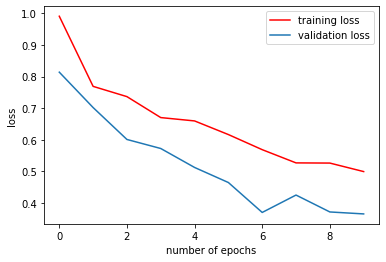

In [50]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

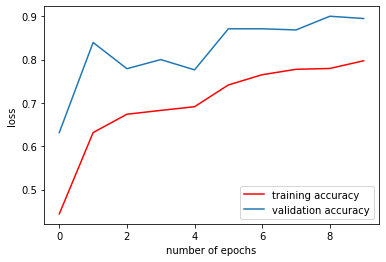

In [51]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()